In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('../data/heart_disease1.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


In [16]:
from sklearn.decomposition import PCA

X = df.drop(columns=['num'])
y = df['num']

pca = PCA()
X_pca_1 = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

pca_n_components = np.argmax(cumulative_variance >= 0.95) + 1


[0.27508971 0.17053755 0.14003634 0.09762063 0.08186751 0.06339657
 0.05716147 0.04580979 0.02248483 0.01654367 0.01159099 0.01010159
 0.00775934]


In [17]:
print(X_pca_1)

[[ 0.28178085  0.37270585  0.77059551 ... -0.01030536  0.08096321
  -0.04527176]
 [ 0.61018351  0.63324754 -0.23305722 ... -0.14388332 -0.15697017
   0.09737063]
 [ 1.15598322  0.34881187 -0.1164146  ...  0.07158167  0.11245263
  -0.1277882 ]
 ...
 [ 0.53625296 -0.52348337  0.22187837 ...  0.18798465  0.07353962
  -0.15383884]
 [ 0.87959358 -0.61343305 -0.39720357 ... -0.03877737 -0.18928953
  -0.17678248]
 [-0.68937077  0.72452051 -0.0738182  ... -0.22188242  0.02319916
  -0.1065088 ]]


In [18]:
print(f"Number of components to retain 95% variance: {pca_n_components}")

Number of components to retain 95% variance: 9


In [19]:
pca2 = PCA(n_components=9)
X_pca_2 = pca2.fit_transform(X)
print(pca2.explained_variance_ratio_) 

[0.27508971 0.17053755 0.14003634 0.09762063 0.08186751 0.06339657
 0.05716147 0.04580979 0.02248483]


In [20]:
print(X_pca_2)

[[ 2.81780850e-01  3.72705848e-01  7.70595515e-01 ...  2.59733135e-01
  -3.86722446e-02  7.20400661e-02]
 [ 6.10183515e-01  6.33247543e-01 -2.33057216e-01 ...  6.29878503e-01
  -2.97181012e-01  1.83842212e-01]
 [ 1.15598322e+00  3.48811871e-01 -1.16414597e-01 ...  1.18162243e-01
  -1.81383023e-01 -3.58048761e-04]
 ...
 [ 5.36252963e-01 -5.23483366e-01  2.21878368e-01 ...  2.63494647e-01
   2.68307409e-01  1.08405310e-01]
 [ 8.79593585e-01 -6.13433045e-01 -3.97203572e-01 ...  6.91910202e-02
  -5.45039635e-04  5.35416589e-02]
 [-6.89370767e-01  7.24520512e-01 -7.38181997e-02 ...  1.14127931e-01
  -2.92380834e-01 -1.57199384e-01]]


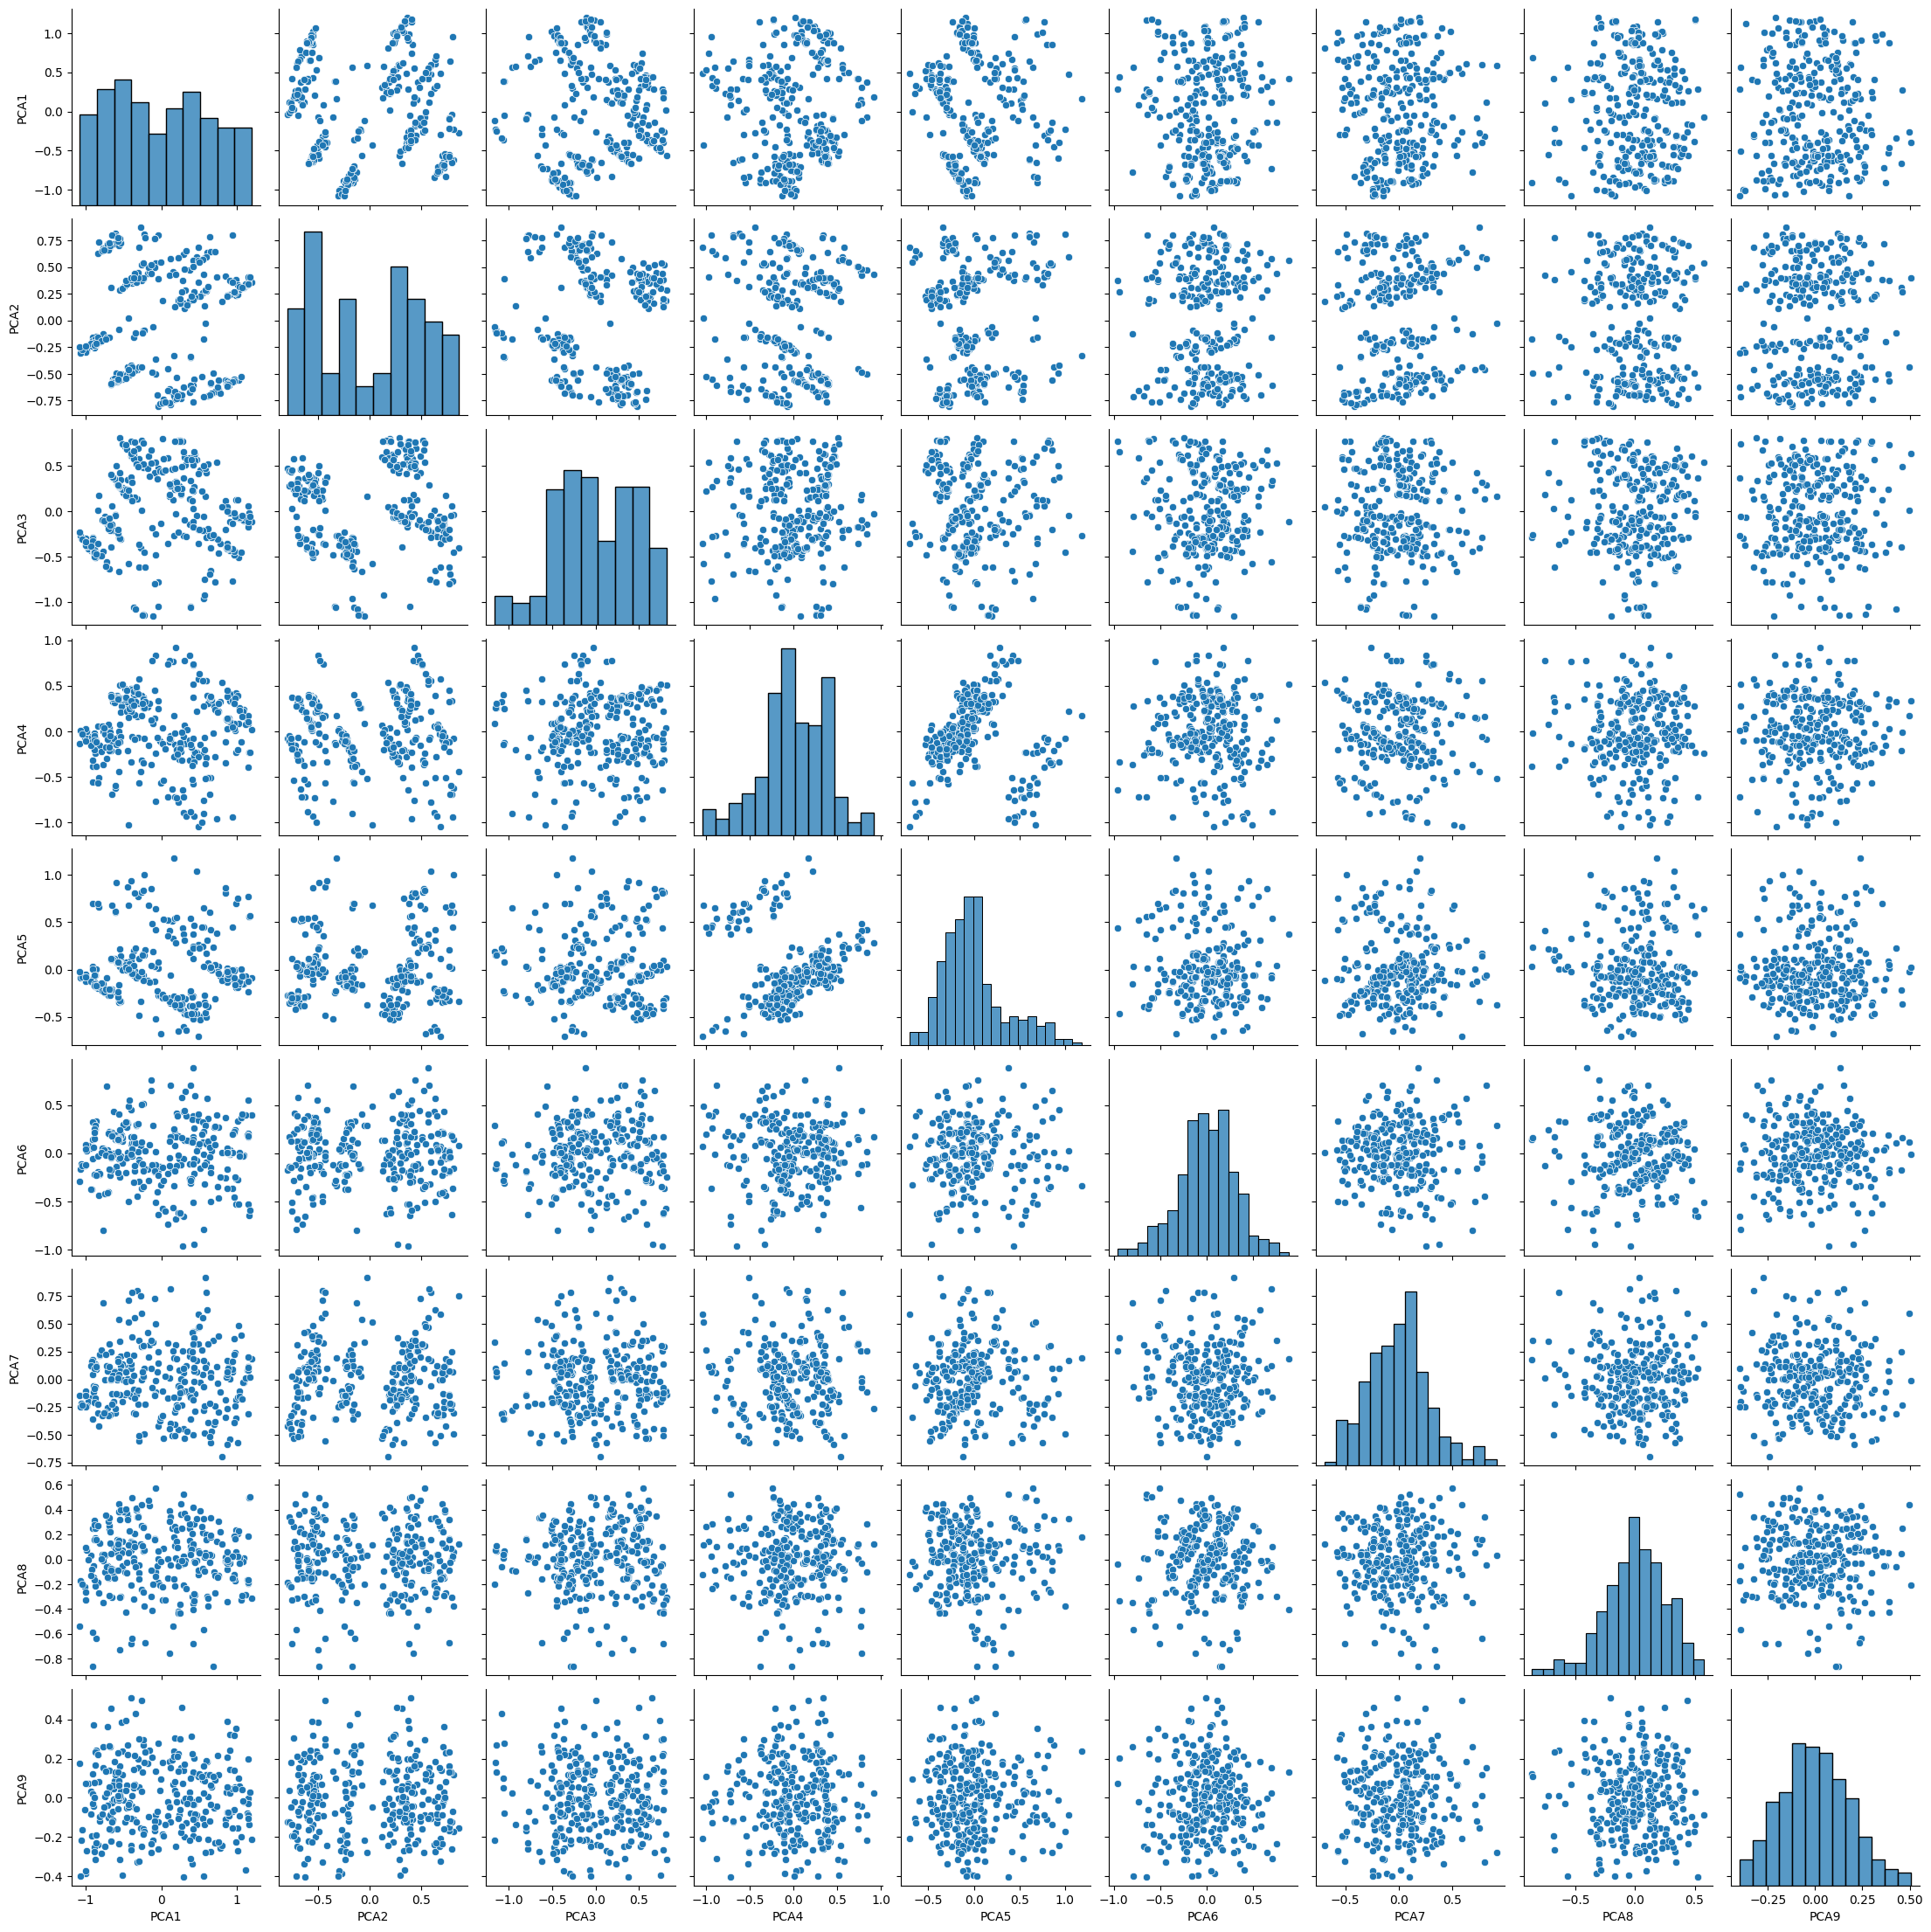

In [21]:
X_pca_2 = pd.DataFrame(X_pca_2, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9'])
sns.pairplot(data=X_pca_2)

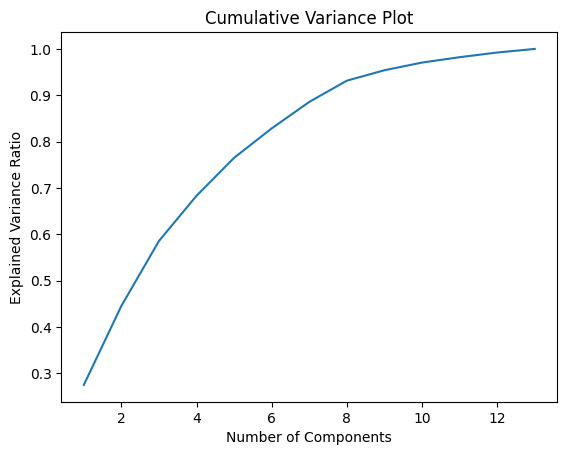

In [22]:

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Cumulative Variance Plot')
plt.show()

In [23]:
y = pd.DataFrame(y, columns=['num'])
df = pd.concat([X_pca_2, y], axis=1)
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,num
0,0.281781,0.372706,0.770596,-0.648349,0.438137,-0.962744,0.259733,-0.038672,0.072040,0.0
1,0.610184,0.633248,-0.233057,0.391237,0.311938,0.570390,0.629879,-0.297181,0.183842,1.0
2,1.155983,0.348812,-0.116415,0.094607,-0.119911,0.207920,0.118162,-0.181383,-0.000358,1.0
3,-0.314593,-0.457716,0.139863,0.160257,-0.073819,-0.441080,0.801208,0.344531,-0.326099,0.0
4,-0.838908,0.626962,0.008752,0.057655,-0.200137,-0.189908,-0.301223,-0.187107,-0.236167,0.0


In [24]:
df.to_csv('../data/heart_disease2.csv')